

## OBJECTIVE
Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

### Problem Statement
* Build a model which predicts sales based on the money spent on different platforms for marketing.

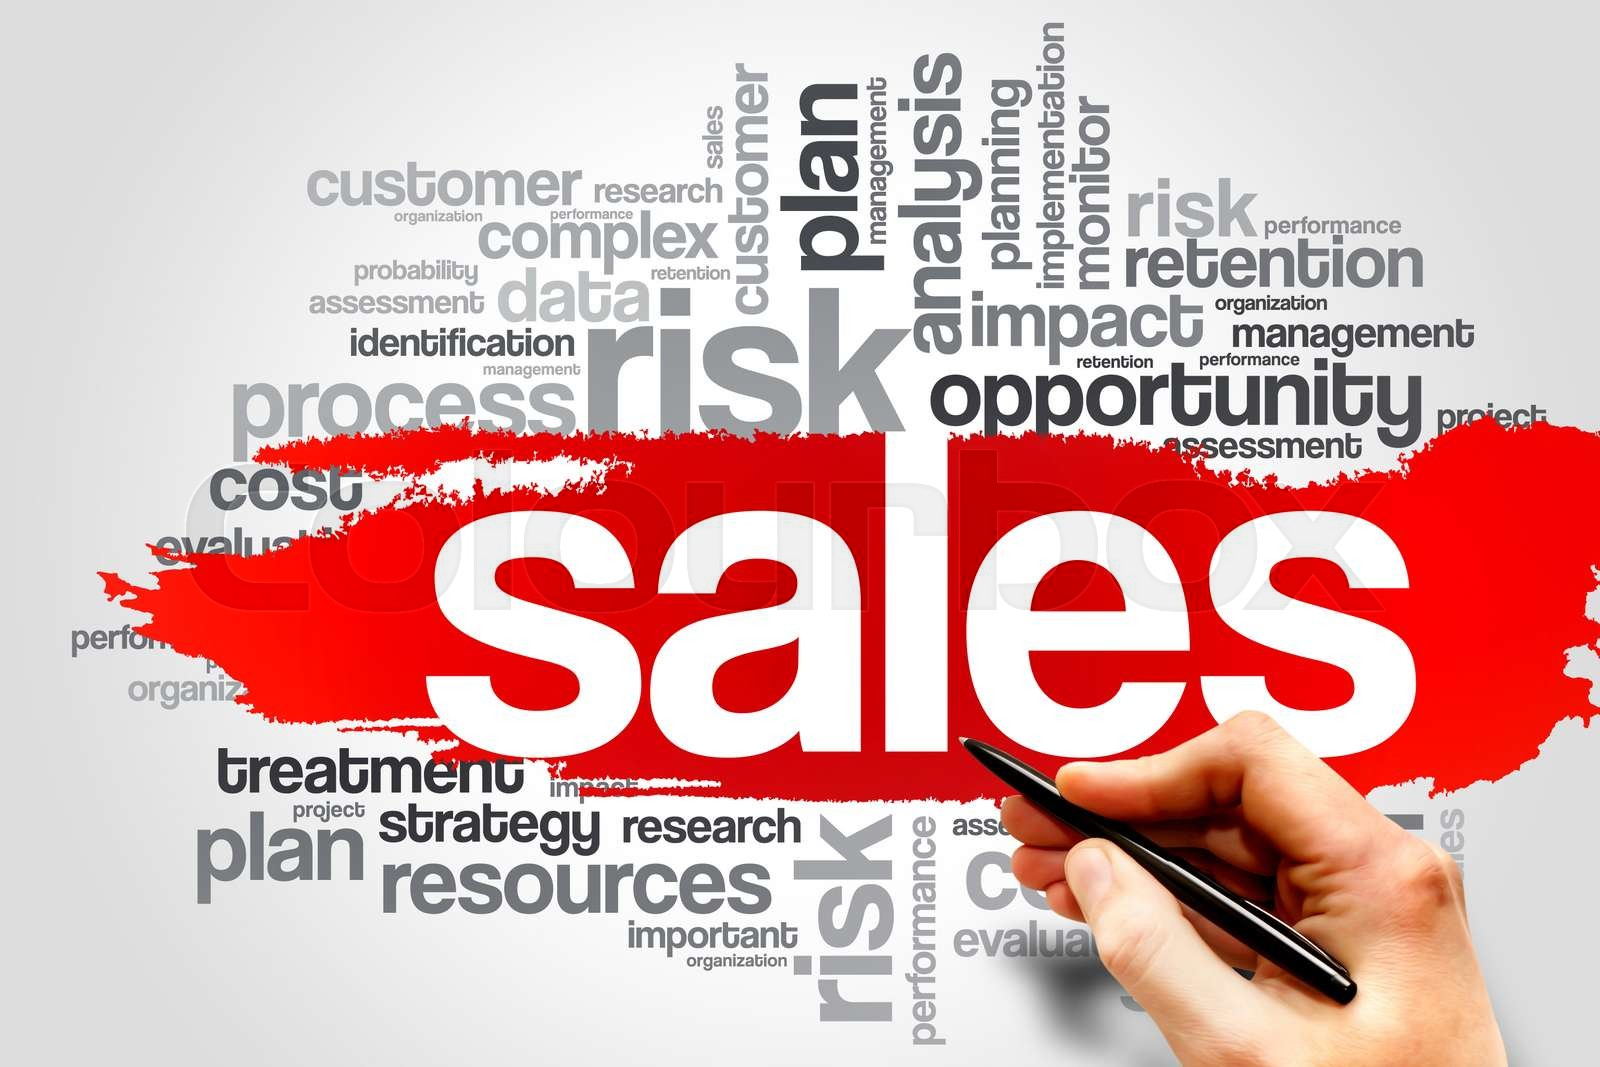

In [1]:
# load important library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df= pd.read_csv('Sales.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# About information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# know about rows and columns
df.shape # There are 4 columns and 200 rows in this dataset.

(200, 4)

In [6]:
# about the dataset variables
df.describe() # There are 4 variables.


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


####  Statistical Observation
- Average investment for expense on TV advertisment.
- Average investment for expense on Radio advertisment.
- Maximum sales is 27 and minimum sales is 1.60.


In [7]:
df.isnull().sum() # No null values in this data.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

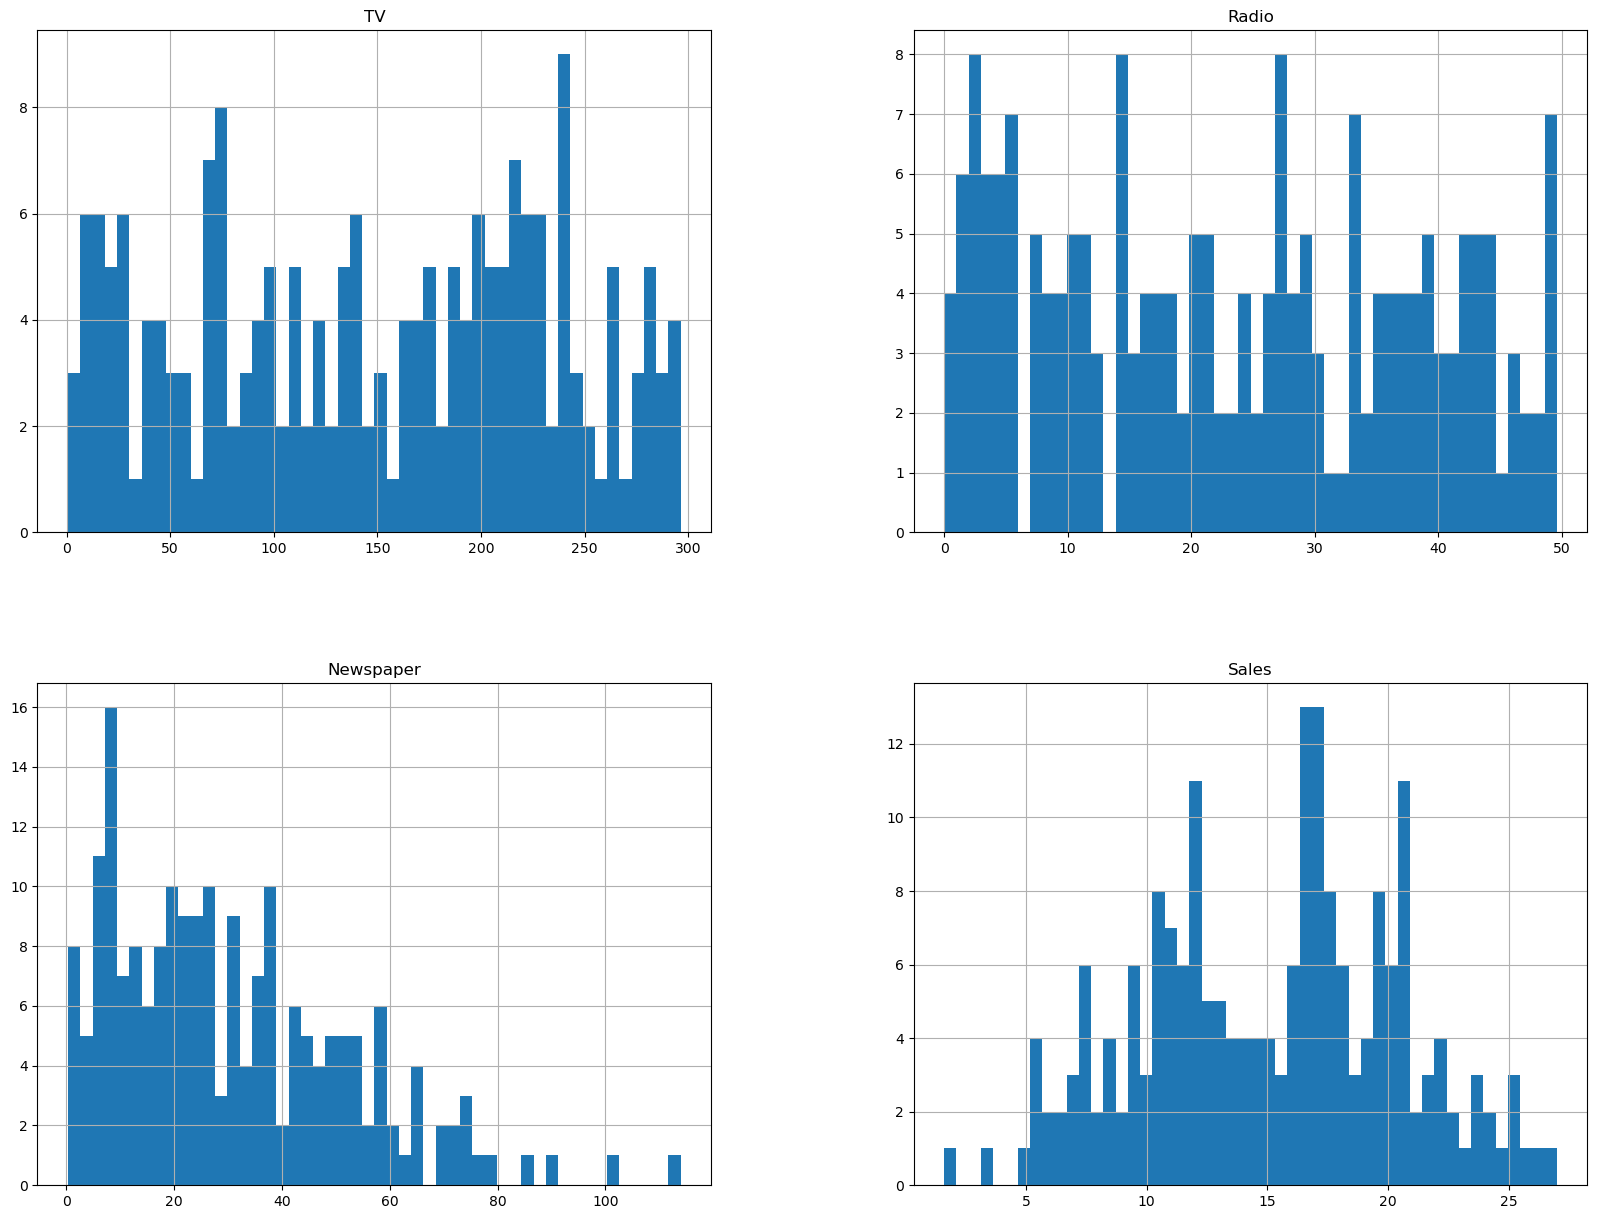

In [9]:
# Visualization
df.hist(bins=50,figsize=(20,15))

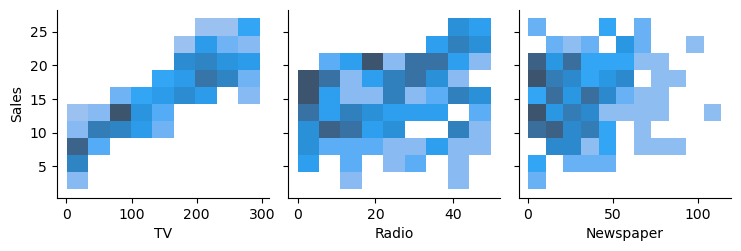

In [10]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars = 'Sales', kind='hist')
plt.show()

According pairplot observation when advertisment cost increases on TV ads then sales will increase as well.while newspaper and radio is bit unpredictable.

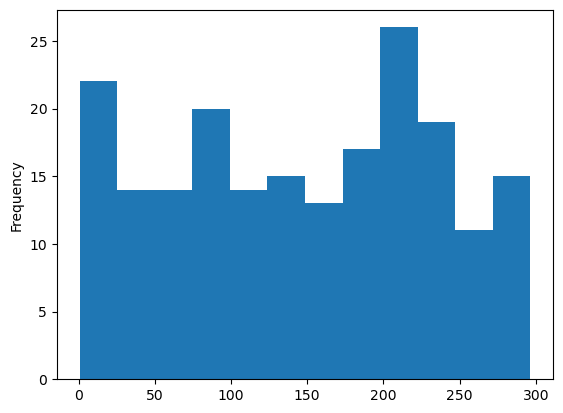

In [11]:
# Histogram
df['TV'].plot.hist(bins=12)
plt.show()

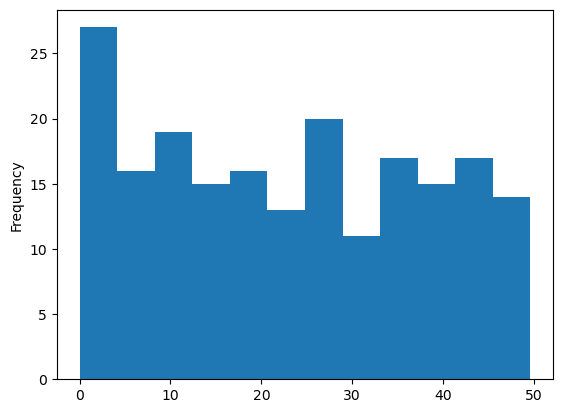

In [12]:
df['Radio'].plot.hist(bins=12)
plt.show()

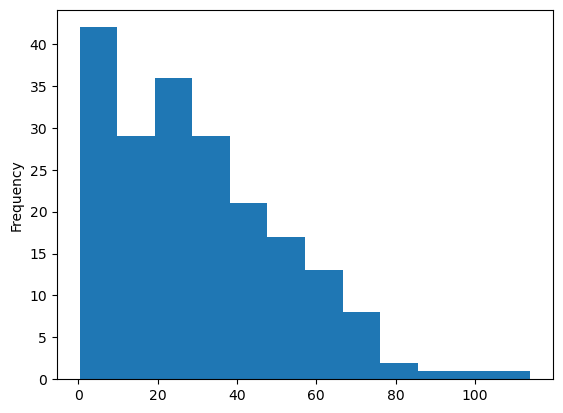

In [13]:
df['Newspaper'].plot.hist(bins=12)
plt.show()

- As per observastion by histogram low advertisment cost of Newspaper.

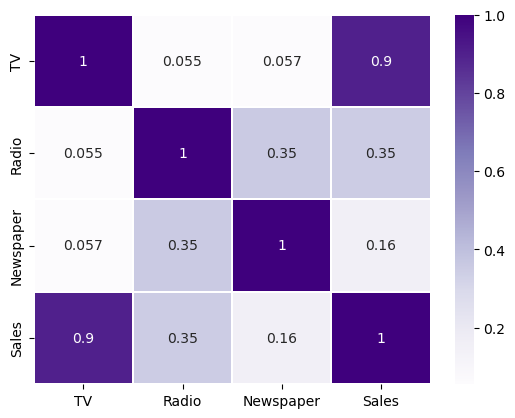

In [14]:
# Coorelation 
sns.heatmap(df.corr(), annot = True, cmap = 'Purples', linewidths = 0.1)
plt.show()

- Sales is the highly correlated with TV.

In [15]:
# --- Splitting Dataset 70:30 and Model selection.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.2, random_state = 0)

In [16]:
x_train.head()

,TV
134,36.9
66,31.5
26,142.9
113,209.6
168,215.4


In [17]:
y_train.head()

,Sales
134,10.8
66,11.0
26,15.0
113,20.9
168,17.1


In [18]:
x_test.head()

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2


In [19]:
y_test.head()

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7


In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Linear Regression
Linear Regression a data plot that graphs the Linear Relationship between an independent and a dependent varibles. It is typically used to visually show the Strength of relationship, the dispersion of results.

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)
linear_pred = model.predict(x_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

In [26]:
print('Linear Regression - R-squared:',linear_r2*100)
#print('DecisionTreeRegressor - R-squared:',tree_r2*100)

Linear Regression - R-squared: 80.10943934328407


In [27]:
# I have selected 2 models for check accuracy in which Linear Regression's accuracy is 80%.

In [28]:
res = model.predict(x_train)
print(res)

[[ 9.1709017 ]
 [ 8.87695647]
 [14.94093769]
 [18.57170561]
 [18.88742456]
 [12.75267876]
 [ 7.63041096]
 [ 8.08221567]
 [14.0046677 ]
 [12.85610393]
 [13.1391623 ]
 [19.65494821]
 [20.97770175]
 [17.22717836]
 [ 9.59548926]
 [10.55353297]
 [23.10608294]
 [16.55219302]
 [18.18522207]
 [ 7.55964637]
 [21.59825279]
 [17.91849399]
 [19.0561709 ]
 [15.18044861]
 [16.48687185]
 [19.01262345]
 [21.46216703]
 [16.0622843 ]
 [12.62747986]
 [11.31561319]
 [17.22717836]
 [14.47280269]
 [22.06094435]
 [23.296603  ]
 [12.39885579]
 [13.1391623 ]
 [21.06479663]
 [18.27231695]
 [20.23195181]
 [17.70620021]
 [17.56467103]
 [12.04503283]
 [ 9.50295094]
 [ 9.24166629]
 [ 7.87536532]
 [20.18840437]
 [ 8.09854596]
 [18.63158334]
 [ 8.55579409]
 [16.79714737]
 [18.424733  ]
 [10.76038331]
 [15.31109094]
 [14.20607461]
 [12.28998719]
 [22.22424726]
 [22.23513412]
 [ 7.58686352]
 [20.81984227]
 [16.72638278]
 [ 7.7991573 ]
 [11.27206575]
 [18.03824945]
 [19.6876088 ]
 [13.00851997]
 [19.4535413 ]
 [16.05139

In [29]:
model.coef_

array([[0.0544343]])

In [30]:
model.intercept_

array([7.16227597])


 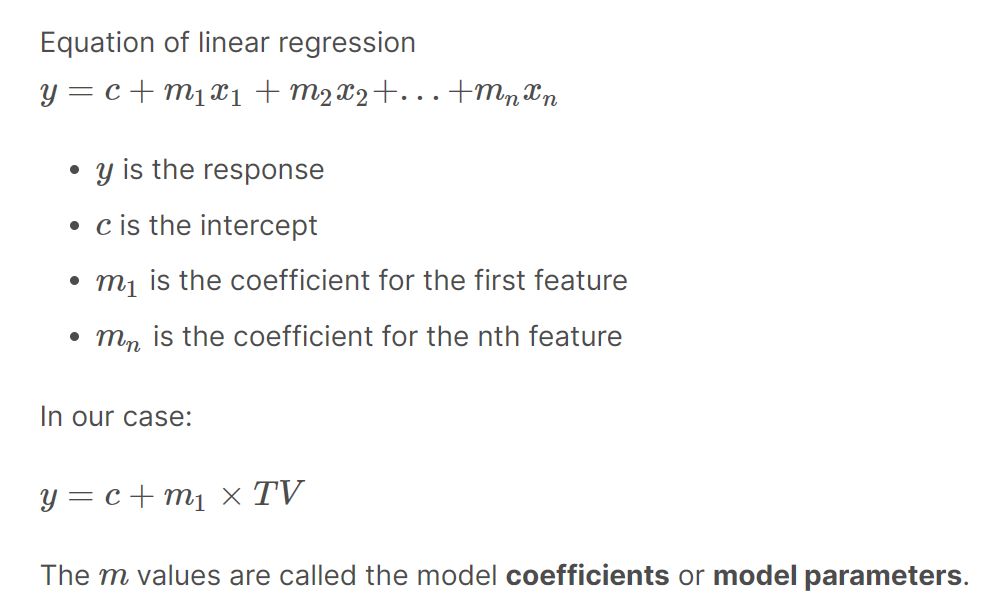

In [31]:
0.0544343*36.9+7.16227597 # 36.9 values taken by TV's 1st column. 

9.17090164

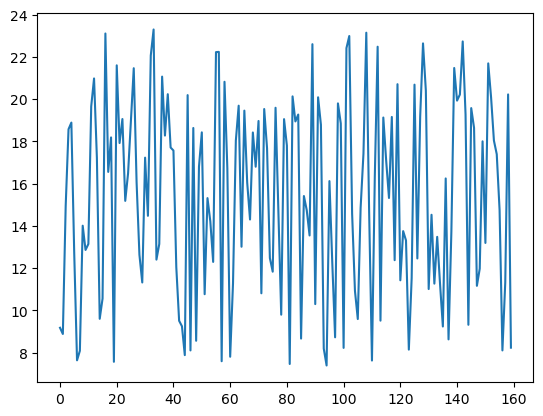

In [32]:
plt.plot(res)

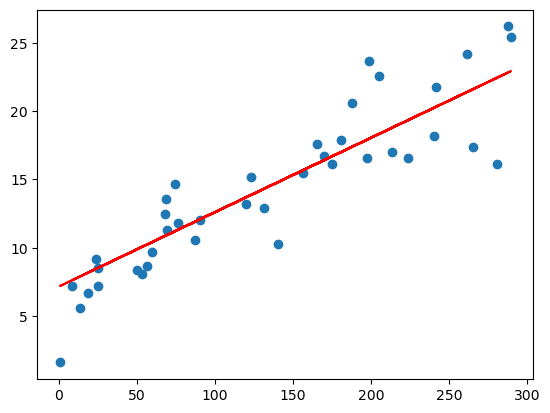

In [36]:

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.scatter(x_test,y_test)
plt.plot(x_test, 7.16227597+0.0544343 * x_test, 'r')
plt.show()

### Conclusion
- I have applied supervised machine learning models like Linear Regression and Decision tree.In which I have find of LR model of accuracy 80%. It's means accuracy is not high.
- Sales is the highly correlated with TV.
- As per observastion by histogram low advertisment cost of Newspaper.
- I have predicted that TV is the best platform for advertising of sales.
